<a href="https://colab.research.google.com/github/shemaaali/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/LS_DS_211_assignment/SD_A1__LS_DS18_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [338]:
import sys
 
# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
 
# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [339]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [340]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]
print(df.shape)
df.head()

(48818, 34)


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,2,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,41,-74,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2016-06-12 12:19:27,,Columbus Avenue,41,-74,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,41,-74,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,41,-74,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,41,-74,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [341]:
# Wrangle data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv', 
                 parse_dates=['created'],
                 index_col='created')
print(df.shape)
df.head()

(49352, 33)


,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,2,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,41,-74,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-12 12:19:27,1,2,,Columbus Avenue,41,-74,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-17 03:26:41,1,1,"Top Top West Village location, beautiful Pre-w...",W 13 Street,41,-74,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-18 02:22:02,1,1,Building Amenities - Garage - Garden - fitness...,East 49th Street,41,-74,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-28 01:32:41,1,4,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,41,-74,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49352 entries, 2016-06-24 07:54:24 to 2016-04-12 02:48:07
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             49352 non-null  float64
 1   bedrooms              49352 non-null  int64  
 2   description           47906 non-null  object 
 3   display_address       49217 non-null  object 
 4   latitude              49352 non-null  float64
 5   longitude             49352 non-null  float64
 6   price                 49352 non-null  int64  
 7   street_address        49342 non-null  object 
 8   interest_level        49352 non-null  object 
 9   elevator              49352 non-null  int64  
 10  cats_allowed          49352 non-null  int64  
 11  hardwood_floors       49352 non-null  int64  
 12  dogs_allowed          49352 non-null  int64  
 13  doorman               49352 non-null  int64  
 14  dishwasher            49352 non-nul

In [343]:
 df.dtypes

bathrooms               float64
bedrooms                  int64
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level           object
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_patio              int64
wheelcha

## EDA

In [344]:
pd.options.display.float_format = '{:,.0f}'.format

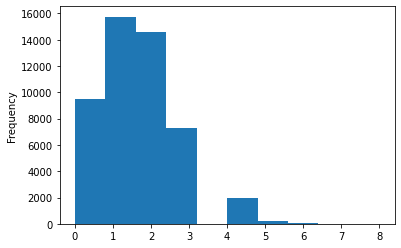

In [345]:
 df['bedrooms'].plot(kind='hist');  

In [346]:
df.describe()['bedrooms']

count   49,352
mean         2
std          1
min          0
25%          1
50%          1
75%          2
max          8
Name: bedrooms, dtype: float64

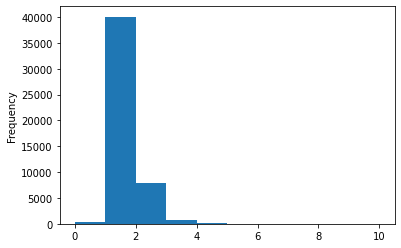

In [347]:
df['bathrooms'].plot(kind='hist');

In [349]:
df['interest_level'].value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

## Split the data

In [350]:
# Split my feature matrix from my target vector
# Target
y = df['bedrooms']
# Feature Matrix
X = df[['bathrooms']]

In [351]:
#import matplotlib.pyplot as plt
#import plotly.express as px

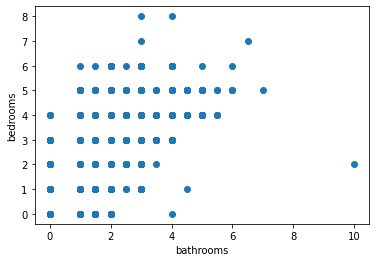

In [359]:
plt.scatter(X, y);
plt.xlabel('bathrooms')
plt.ylabel('bedrooms')
plt.show()

## Train-validation split


In [214]:
# We can do split randomly. However, sometimes when we're working with time series, we need to split by using a cutoff date

cutoff_date = '2016-04-17 03:26:41'
mask = X.index < cutoff_date
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

## Establish Baseline

In [215]:
y_train

created
2016-04-13 06:01:42    1
2016-04-02 02:58:15    4
2016-04-14 01:10:30    0
2016-04-09 01:22:11    2
2016-04-09 03:49:42    1
                      ..
2016-04-11 03:29:05    1
2016-04-04 18:22:34    1
2016-04-16 02:13:40    1
2016-04-08 02:13:33    0
2016-04-12 02:48:07    2
Name: bedrooms, Length: 8986, dtype: int64

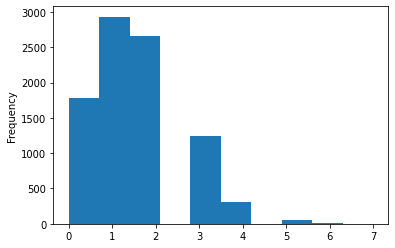

In [216]:
y_train.plot(kind='hist');

In [218]:
baseline_guess = y_train.mean()

MAE = abs(y_train - baseline_guess).mean()

print(f'''If my baseline model always predicts {baseline_guess}, 
on average, the prediction will be off by {MAE}.''')

If my baseline model always predicts 1.5027821054974404, 
on average, the prediction will be off by 0.9254676104466746.


## Build My Model

In [225]:
# 1. Arrange X features matrix and y target vector
y= df['bedrooms']
X= df[['bathrooms']]

In [ ]:
# 2. Creating a train_test split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
# 3. Import the appropriate estimtor class from Scikit-learn
from sklearn.linear_model import LinearRegression

In [227]:
# 4. Instantiate your predictor
lr = LinearRegression();

In [228]:
# Arrange X features matrix and y target vector
y= df['bedrooms']
X= df[['bathrooms']]

In [229]:
# 5. Fit the model which is train my predictor by using the training data
lr.fit(X_train,y_train);

In [230]:
# 6. Apply the model to the new data which is testing data
from sklearn.metrics import mean_absolute_error

In [231]:
# Comparing my matrixes
print('Training MAE:', mean_absolute_error(y_train, lr.predict(X_train)))
print('Testing MAE:', mean_absolute_error(y_test, lr.predict(X_test)))

Training MAE: 0.7738725528489321
Testing MAE: 0.7806914429715129


In [232]:
lr.coef_

array([1.1481261])

In [233]:
lr.intercept_

0.1215427087287484

In [237]:
# Explain the coeffician
def predict(bathrooms):
    y_pred = lr.predict([[bathrooms]])
    estimate = y_pred[0]
    coefficient = lr.coef_[0]
    result = f'${estimate:,.0f} estimated bedrooms for {bathrooms:,.0f} bathroom in apartment.'
    explanation = f'In this linear regression, each additional bathroom adds ${coefficient:,.0f}.'
    return result + '\n' + explanation

print(predict(1497))

$1,719 estimated bedrooms for 1,497 bathroom in apartment.
In this linear regression, each additional bathroom adds $1.


## Stretch Goals
[ ] Do linear regression with two or more features.

[ ] Read The Discovery of Statistical Regression

[ ] Read An Introduction to Statistical Learning, Chapter 2.1: What Is Statistical Learning?

In [302]:
y1 =df['bedrooms']
y2 = df['elevator']

X1 = df[['bathrooms']]               
X2 = df[['longitude']]  

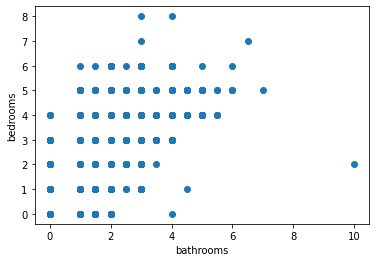

In [303]:
plt.scatter(X1, y1);
plt.xlabel('bathrooms')
plt.ylabel('bedrooms')
plt.show()


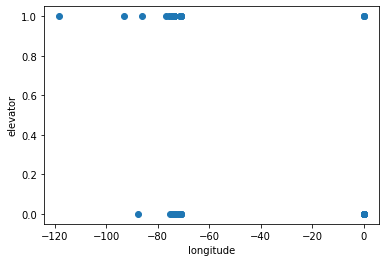

In [304]:
plt.scatter(X2, y2);
plt.xlabel('longitude')
plt.ylabel('elevator')
plt.show()

In [305]:
# We can do split randomly. However, sometimes when we're working with time series, we need to split by using a cutoff date

cutoff_date_s = '2016-04-17 03:26:41'
mask = X1.index < cutoff_date_s
X1_train, y1_train = X1.loc[mask], y1.loc[mask]
X1_test, y1_test = X1.loc[~mask], y1.loc[~mask]

In [306]:
# We can do split randomly. However, sometimes when we're working with time series, we need to split by using a cutoff date

cutoff_date_sp = '2016-04-17 03:26:41'
mask = X2.index < cutoff_date_sp
X2_train, y2_train = X2.loc[mask], y2.loc[mask]
X2_test, y2_test = X2.loc[~mask], y2.loc[~mask]

In [307]:
y1_train

created
2016-04-13 06:01:42    1
2016-04-02 02:58:15    4
2016-04-14 01:10:30    0
2016-04-09 01:22:11    2
2016-04-09 03:49:42    1
                      ..
2016-04-11 03:29:05    1
2016-04-04 18:22:34    1
2016-04-16 02:13:40    1
2016-04-08 02:13:33    0
2016-04-12 02:48:07    2
Name: bedrooms, Length: 8986, dtype: int64

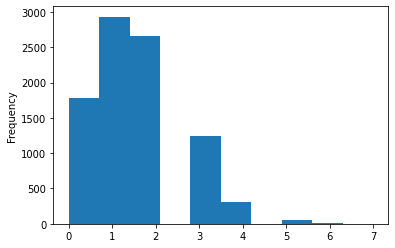

In [308]:
y1_train.plot(kind='hist');

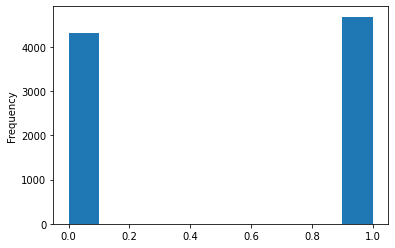

In [309]:
y2_train.plot(kind='hist');

In [310]:
baseline_guess = y1_train.mean()

MAE = abs(y1_train - baseline_guess).mean()

print(f'''If my baseline model always predicts {baseline_guess}, 
on average, the prediction will be off by {MAE}.''')

If my baseline model always predicts 1.5027821054974404, 
on average, the prediction will be off by 0.9254676104466746.


In [311]:
baseline_guess = y2_train.mean()

MAE = abs(y2_train - baseline_guess).mean()

print(f'''If my baseline model always predicts {baseline_guess}, 
on average, the prediction will be off by {MAE}.''')

If my baseline model always predicts 0.5205875806810595, 
on average, the prediction will be off by 0.4991523030434045.


In [312]:
# Build the model
# 1. Arrange X features matrix and y target vector
y1 =df['bedrooms']
y2 = df['elevator']

X1 = df[['bathrooms']]               
X2 = df[['longitude']]  

In [ ]:
# 2. Creating a train_test split
from sklearn.linear_model import LinearRegression
X1_train,X2_train, X1_test,X2_test, y1_train, y2_train, y1_test, y2_test, = train_test_split(X1, X2, y1, y2, test_size=0.2, random_state=42)

In [313]:
# 3. Import the appropriate estimtor class from Scikit-learn
from sklearn.linear_model import LinearRegression

In [314]:
# 4. Instantiate your predictor
lr = LinearRegression();

In [315]:
# Build the model
# 1. Arrange X features matrix and y target vector
y1 =df['bedrooms']
y2 = df['elevator']

X1 = df[['bathrooms']]               
X2 = df[['longitude']]  

In [317]:
# 5. Fit the model which is train my predictor by using the training data
lr.fit(X1_train,y1_train);
lr.fit(X2_train,y2_train);

In [318]:
# 6. Apply the model to the new data which is testing data
from sklearn.metrics import mean_absolute_error

In [319]:
# Comparing my matrixes
print('Training MAE:', mean_absolute_error(y1_train, lr.predict(X1_train)))
print('Testing MAE:', mean_absolute_error(y1_test, lr.predict(X1_test)))

Training MAE: 13.645605415614515
Testing MAE: 13.69499587536614


In [320]:
print('Training MAE:', mean_absolute_error(y2_train, lr.predict(X2_train)))
print('Testing MAE:', mean_absolute_error(y2_test, lr.predict(X2_test)))

Training MAE: 0.49842496239409034
Testing MAE: 0.501760613994503


In [321]:
lr.coef_

array([-0.16844758])

In [322]:
lr.intercept_

-11.940174465386828

In [334]:
# Explain the coeffician
def predict(longitude):
    y1_pred = lr.predict([[longitude]])
    estimate = y1_pred[0]
    coefficient = lr.coef_[0]
    result = f'${estimate:,.0f} estimated elevator for {longitude:,.0f} longitude in apartment.'
    explanation = f'In this linear regression, each additional longitude adds ${coefficient:,.0f}.'
    return result + '\n' + explanation

print(predict(1497))

$-264 estimated elevator for 1,497 longitude in apartment.
In this linear regression, each additional longitude adds $-0.


In [337]:
def predict(bathrooms):
    y2_pred = lr.predict([[bathrooms]])
    estimate = y2_pred[0]
    coefficient = lr.coef_[0]
    result = f'${estimate:,.0f} estimated price for {bathrooms:,.0f} bathrooms in Apartment.'
    explanation = f'In this linear regression, each additional bathrooms adds ${coefficient:,.0f}.'
    return result + '\n' + explanation

print(predict(1497))

$-264 estimated price for 1,497 bathrooms in Apartment.
In this linear regression, each additional bathrooms adds $-0.
